In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_fb = pd.read_csv("fifa.csv")

In [3]:
df_fb.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Droping the unnecessary columns

In [4]:
df_fb.drop('Photo', axis = 1, inplace = True)

In [5]:
df_fb.drop('Flag', axis = 1, inplace = True)

In [6]:
df_fb.drop('Club Logo', axis = 1, inplace = True)

In [7]:
df_fb.drop('Jersey Number', axis = 1, inplace = True)

### Release Clause - Imputing null values and converting it to float

In [8]:
df_fb['Release Clause'].replace(np.nan, "€0.0", inplace = True)

In [9]:
df_fb['Release Clause'].isnull().sum()

0

In [10]:
def RelClause(x):
    cla=str(x)
    if cla[-1]=="M":
        return float(cla[1:-1])*1000000
    elif cla[-1]=='K':
        return float(cla[1:-1])*1000
    else:
        return float(cla[1:])
df_fb["Release Clause"]=df_fb["Release Clause"].apply (lambda x:RelClause(x))

In [11]:
df_fb["Release Clause"].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

### Value, Wage - Imputing null values and converting it to float

In [12]:
df_fb['Value'].isnull().sum()

0

In [13]:
df_fb['Wage'].isnull().sum()

0

In [14]:
def ValConv (x):
    val=str(x)
    if val [-1]=="M":
        return float(val[1:-1])*1000000
    elif val [-1]=='K':
        return float(val[1:-1])*1000
    else:
        return float(val[1:])
df_fb["Value"]=df_fb["Value"].apply (lambda x: ValConv(x))
df_fb["Wage"]=df_fb["Wage"].apply(lambda x: ValConv(x))

In [15]:
df_fb['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [16]:
df_fb['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

### Joined  - Replacing null values and coverting date time to year format

In [17]:
def d2s (y):
    
    date_str = str(y)
    
    if len(date_str) == 3:                                                   # handling null values
        date_str = str(df_fb['Joined'].mode()[0])
        date_object = datetime.strptime(date_str, '%b %d, %Y').date()
        return date_object.year
    else:
        date_object = datetime.strptime(date_str, '%b %d, %Y').date()
        return date_object.year
    
df_fb["Joined_Year"]=df_fb["Joined"].apply(lambda x: d2s(x))

In [18]:
df_fb['Joined_Year'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined_Year, dtype: int64

In [19]:
df_fb['Joined_Year'].isnull().sum()

0

### Contract valid date  - Replacing null values and coverting date time to year format

In [20]:
df_fb['Contract Valid Until'].isnull().sum()

289

In [21]:
df_fb['Contract Valid Until'].replace(np.nan, df_fb['Contract Valid Until'].mode()[0], inplace = True)

In [22]:
df_fb['Contract Valid Until'].isnull().sum()

0

In [23]:
def DateTimeConv(date_time):
    
    date_time_str = str(date_time)
    if len(date_time_str)==4:
        date = datetime.strptime(date_time_str, '%Y').date()
        return date.year
    else:
        date = datetime.strptime(date_time_str, '%b %d, %Y').date()
        return date.year
                                      
df_fb['Contract Valid Until'] = df_fb['Contract Valid Until'].apply(lambda x : DateTimeConv(x))

In [24]:
df_fb['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: int64

### Weight - Replacing null values and coverting weight to float by removing 'lbs' as suffix

In [25]:
df_fb['Weight'].isnull().sum()

48

In [26]:
df_fb['Weight'].replace(np.nan, df_fb['Weight'].mode()[0], inplace = True)

In [27]:
df_fb['Weight'].isnull().sum()

0

In [28]:
df_fb['Weight'] = df_fb['Weight'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)

In [29]:
df_fb['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

### Height - Replacing null values and coverting height to float

In [30]:
df_fb['Height'].mode()

0    6'0
dtype: object

In [31]:
df_fb['Height'].replace(np.nan, df_fb['Height'].mode()[0], inplace = True)

In [32]:
df_fb['Height'].isnull().sum()

0

In [33]:
def height_con (h):
    
    height = str(h)
    s = h.split("'")
    return float(s[0])*12+float(s[1])

df_fb['Height'] = df_fb['Height'].apply(lambda x : height_con(x))

In [34]:
df_fb['Height'].head()

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64

## PLOTS

### Question 1

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

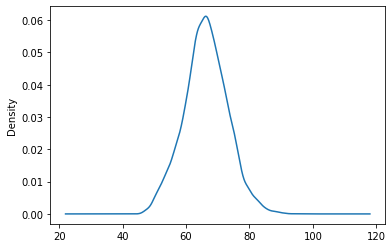

In [35]:
df_fb['Overall'].plot(kind = 'density')
df_fb['Overall'].describe()

### Question 2

C:\Users\ganes\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ganes\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


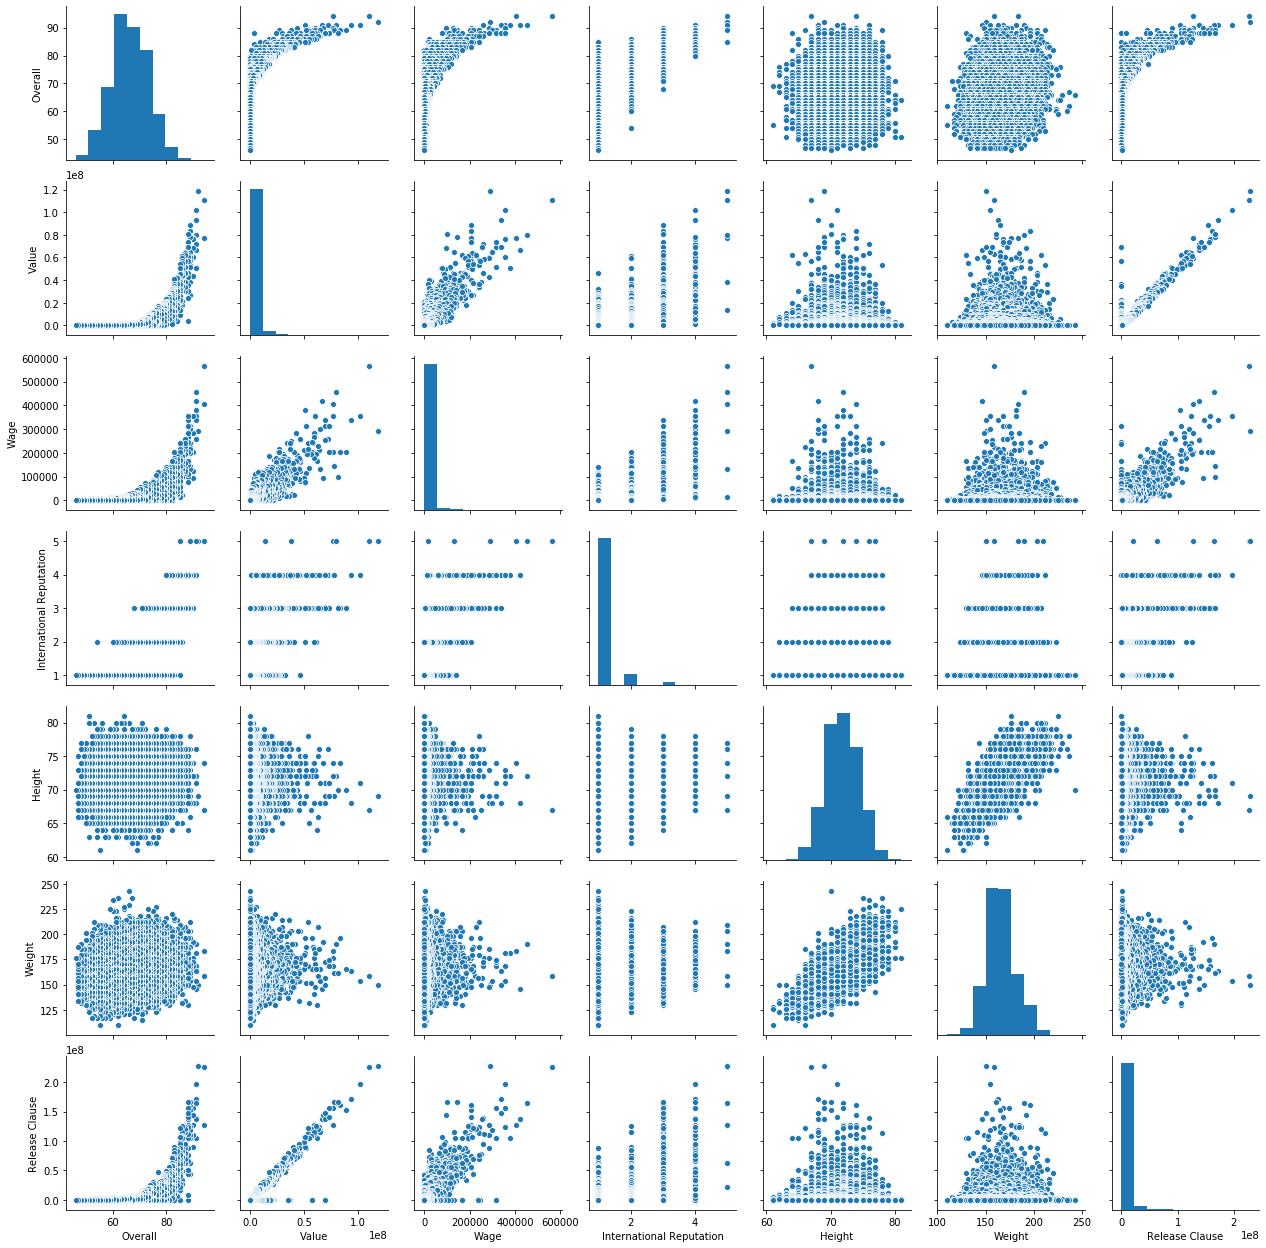

In [36]:
sns.pairplot(df_fb[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']], dropna=True)

### QUESTION 3

In [37]:
df_fb['rank'] = df_fb['Overall'].rank(method = 'average')

In [38]:
mask = df_fb.loc[:,'Contract Valid Until'] == 2020

In [39]:
result = df_fb[mask].sort_values(by = 'rank', ascending = False)

In [40]:
squad = result[['Name','Age','Overall','Value','Wage']].head(15)
squad

,Name,Age,Overall,Value,Wage
3,De Gea,27,91,72000000.0,260000.0
6,L. Modrić,32,91,67000000.0,420000.0
8,Sergio Ramos,32,91,51000000.0,380000.0
5,E. Hazard,27,91,93000000.0,340000.0
13,David Silva,32,90,60000000.0,285000.0
21,E. Cavani,31,89,60000000.0,200000.0
24,G. Chiellini,33,89,27000000.0,215000.0
31,C. Eriksen,26,88,73500000.0,205000.0
39,Thiago Silva,33,88,24000000.0,165000.0
50,D. Mertens,31,87,45000000.0,135000.0


In [41]:
print("Average age of the squad is : ",squad['Age'].mean())

Average age of the squad is :  30.0


In [42]:
print("Average wage of the squad is : ",round(squad['Wage'].mean(),2))

Average wage of the squad is :  232333.33


In [43]:
squad.corr()

,Age,Overall,Value,Wage
Age,1.000000,0.144501,-0.508430,0.114274
Overall,0.144501,1.000000,0.650323,0.842385
Value,-0.508430,0.650323,1.000000,0.545524
Wage,0.114274,0.842385,0.545524,1.000000


### A positive co relation exists between overall and value of these players

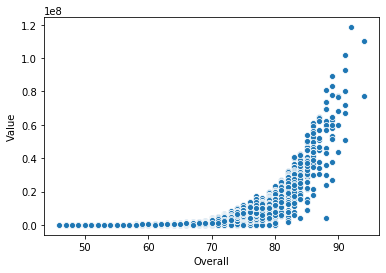

In [44]:
sns.scatterplot(x = df_fb['Overall'], y = df_fb['Value'])

### Question 4

In [45]:
df_fb['Position'].replace(np.nan, df_fb['Position'].mode()[0], inplace = True)

In [46]:
df = df_fb.sort_values(by = 'Overall', ascending = False)
df = df.groupby(by = 'Position', axis = 0)[['Name','Nationality','Position','Overall','Wage']].head(5).sort_values(by = ['Position','Overall'], ascending = [True,False])
df.head(15)

,Name,Nationality,Position,Overall,Wage
17,A. Griezmann,France,CAM,89,145000.0
31,C. Eriksen,Denmark,CAM,88,205000.0
74,M. Özil,Germany,CAM,86,190000.0
66,T. Müller,Germany,CAM,86,135000.0
61,Roberto Firmino,Brazil,CAM,86,195000.0
12,D. Godín,Uruguay,CB,90,125000.0
42,S. Umtiti,France,CB,87,205000.0
73,M. Benatia,Morocco,CB,86,160000.0
102,Naldo,Brazil,CB,85,38000.0
104,Miranda,Brazil,CB,85,96000.0


In [47]:
mask = df.duplicated(['Name','Nationality','Overall','Wage'], keep = 'last')
df[mask].count()

Name           0
Nationality    0
Position       0
Overall        0
Wage           0
dtype: int64

### No players were repeated in these positions

In [48]:
pd.DataFrame(df.groupby('Position')['Wage'].mean())

,Wage
Position,
CAM,174000.0
CB,124800.0
CDM,199200.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
